In [1]:
%matplotlib nbagg
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
names= pd.read_csv('NationalNames.csv',sep=',',header=0,names=["id","name","year","sex","births"])

In [3]:
names.shape

(1825433, 5)

In [4]:
names.head()

,id,name,year,sex,births
0,1,Mary,1880,F,7065
1,2,Anna,1880,F,2604
2,3,Emma,1880,F,2003
3,4,Elizabeth,1880,F,1939
4,5,Minnie,1880,F,1746


In [5]:
names.tail()

,id,name,year,sex,births
1825428,1825429,Zykeem,2014,M,5
1825429,1825430,Zymeer,2014,M,5
1825430,1825431,Zymiere,2014,M,5
1825431,1825432,Zyran,2014,M,5
1825432,1825433,Zyrin,2014,M,5


births 를 인덱스 year 열을 sex 함수 sum

In [6]:
birth_sum_by_name = names.pivot_table(values = "births", index = "year", columns = "sex", aggfunc = "sum") 
birth_sum_by_name.head()

sex,F,M
year,,
1880,90993,110491
1881,91954,100745
1882,107850,113688
1883,112321,104629
1884,129022,114445


In [7]:
birth_sum_by_name.tail()

sex,F,M
year,,
2010,1772738,1913851
2011,1753500,1893230
2012,1753922,1889414
2013,1745339,1881463
2014,1768775,1901376


<IPython.core.display.Javascript object>


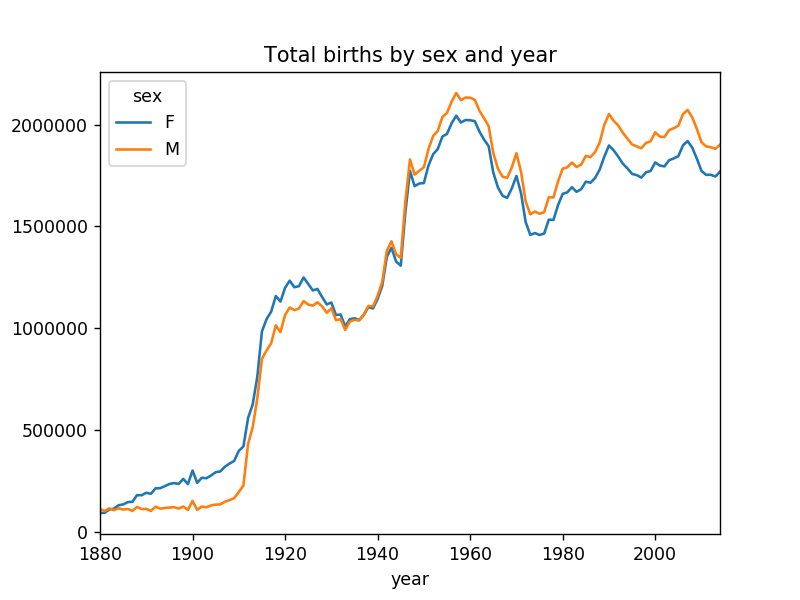

In [8]:
ax = birth_sum_by_name.plot()

In [9]:
ax.set_title("Total births by sex and year")

In [10]:
names.head()

,id,name,year,sex,births
0,1,Mary,1880,F,7065
1,2,Anna,1880,F,2604
2,3,Emma,1880,F,2003
3,4,Elizabeth,1880,F,1939
4,5,Minnie,1880,F,1746


In [11]:
group_name = names.groupby(["year","sex"]).sum()
#group_name = names.groupby("sex").births.sum()
group_name.head()

id  births
year sex                 
1880 F     444153   90993
     M    1556847  110491
1881 F    2316391   91954
     M    3426689  100745
1882 F    4574086  107850

In [13]:
total_births = names.pivot_table(values = "births", index = "year", columns = "name", aggfunc = "sum") 
subset = total_births[['Jhon','Harry','Mary','Marilyn']]

<IPython.core.display.Javascript object>


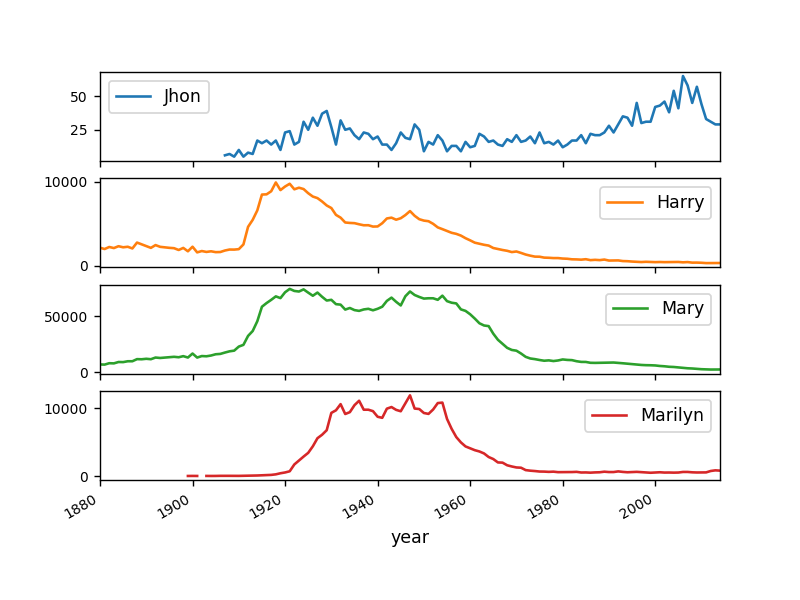

In [14]:
ax = subset.plot(subplots=True, fontsize=8)

각 연도, 성별 그룹내에서 각 이름의 출생 횟수가 전체에서 차지하는 비중을 나타내는 열 추가

In [19]:
grouped_names_dict = dict(list(names.groupby(["year","sex"])))

In [24]:
grouped_sample = grouped_names_dict[(2011,"M")]
grouped_sample.head(10)

,id,name,year,sex,births
1711173,1711174,Jacob,2011,M,20331
1711174,1711175,Mason,2011,M,19488
1711175,1711176,William,2011,M,17314
1711176,1711177,Jayden,2011,M,16954
1711177,1711178,Noah,2011,M,16838
1711178,1711179,Michael,2011,M,16744
1711179,1711180,Ethan,2011,M,16665
1711180,1711181,Alexander,2011,M,15681
1711181,1711182,Aiden,2011,M,15469
1711182,1711183,Daniel,2011,M,15249


In [31]:
def add_prop(agg_df):
    agg_births=agg_df["births"]
    agg_df["prop"]=agg_births/agg_births.sum()
    return agg_df

In [38]:
names_with_prop=names.groupby(["year","sex"]).apply(add_prop)

In [40]:
names_with_prop.head(10)

,id,name,year,sex,births,prop
0,1,Mary,1880,F,7065,0.077643
1,2,Anna,1880,F,2604,0.028618
2,3,Emma,1880,F,2003,0.022013
3,4,Elizabeth,1880,F,1939,0.021309
4,5,Minnie,1880,F,1746,0.019188
5,6,Margaret,1880,F,1578,0.017342
6,7,Ida,1880,F,1472,0.016177
7,8,Alice,1880,F,1414,0.015540
8,9,Bertha,1880,F,1320,0.014507
9,10,Sarah,1880,F,1288,0.014155


In [62]:
grouped_sample.sort_values(by = "births", ascending = False).iloc[:10]

,id,name,year,sex,births
1711173,1711174,Jacob,2011,M,20331
1711174,1711175,Mason,2011,M,19488
1711175,1711176,William,2011,M,17314
1711176,1711177,Jayden,2011,M,16954
1711177,1711178,Noah,2011,M,16838
1711178,1711179,Michael,2011,M,16744
1711179,1711180,Ethan,2011,M,16665
1711180,1711181,Alexander,2011,M,15681
1711181,1711182,Aiden,2011,M,15469
1711182,1711183,Daniel,2011,M,15249


In [57]:
grouped_sample_W = grouped_names_dict[(2014,"F")]
grouped_sample_W.sort_values(by = "births", ascending = False).iloc[:10]

,id,name,year,sex,births
1792389,1792390,Emma,2014,F,20799
1792390,1792391,Olivia,2014,F,19674
1792391,1792392,Sophia,2014,F,18490
1792392,1792393,Isabella,2014,F,16950
1792393,1792394,Ava,2014,F,15586
1792394,1792395,Mia,2014,F,13442
1792395,1792396,Emily,2014,F,12562
1792396,1792397,Abigail,2014,F,11985
1792397,1792398,Madison,2014,F,10247
1792398,1792399,Charlotte,2014,F,10048
